In [2]:
# The simplest possible classifier is the nearest neighbor: given a new observation X_test, find in the training set (i.e.
# the data used to train the estimator) the observation(s) with the closest feature vector.

# This script illustrates the usage of kNN. 

%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
# See '2 - Decision Trees' for a description of this data set
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features in order to easily visualize the results. 
                      # We could avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [7]:
# Exercise (1 minute):
# Train a k-NN model with k = 3

# ...write your code here...

# See next cell for answer

In [8]:
# specify the desired number of neighbors for our kNN classifier
n_neighbors = 3

# create the model
# KNeighborsClassifier is implementing the k-nearest neighbors vote
clf = neighbors.KNeighborsClassifier(n_neighbors)
# Apart from the number of neighbors you can also specify the distance metric to be used
# Wikipedia entry for k-nearest neighbors classifier: http://en.wikipedia.org/wiki/K-nearest_neighbor_algorithm

## Train the model (fit the data)
clf = clf.fit(X, y)

In [9]:
# Finds the K-neighbors of a point.
print 'The k nearest neighbors (and the corresponding distances) to user [1, 1] are:', clf.kneighbors([[1., 1.]])

# Finds the K-neighbors of all points in the training set.
print 'The k nearest neighbors to each user are:', clf.kneighbors(X, return_distance=False) 

# Computes the (weighted) graph of k-Neighbors for points in X (complete training set)
A = clf.kneighbors_graph(X)
A.toarray()

The k nearest neighbors (and the corresponding distances) to user [1, 1] are: (array([[ 3.73363094,  3.85875628,  3.89486842]]), array([[41, 13,  8]], dtype=int64))
The k nearest neighbors to each user are: [[ 17   0  40]
 [  1  25  37]
 [  2  29  47]
 [  3  47  29]
 [  4  43  40]
 [ 16   5  10]
 [  6  47  22]
 [  7  26  39]
 [  8  38  13]
 [  9  34  37]
 [ 10  48  16]
 [ 11  24   6]
 [ 45  12  30]
 [ 13  38   8]
 [ 14  18  33]
 [ 15  33  14]
 [ 16   5  10]
 [ 17   0  40]
 [ 18  14  10]
 [ 44  46  19]
 [ 31  20  36]
 [ 21  46  19]
 [ 22   6  11]
 [ 23  49  39]
 [ 11  24   6]
 [ 25   1  37]
 [  7  26  39]
 [ 27  28   0]
 [ 28  27  39]
 [  2  29  47]
 [ 30  45  12]
 [ 31  20  36]
 [ 32  16   5]
 [ 33  15  32]
 [  9  34  37]
 [ 35  49  23]
 [ 36  20  31]
 [  9  34  37]
 [ 38   8  13]
 [ 39  26   7]
 [ 40  43  17]
 [ 41  57 106]
 [ 42  47  38]
 [ 40  43  17]
 [ 44  46  19]
 [ 45  12  30]
 [ 44  46  19]
 [ 47   3  29]
 [ 48  10  21]
 [ 49  23  35]
 [ 50 120 139]
 [115  51 110]
 [ 52 139 141

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

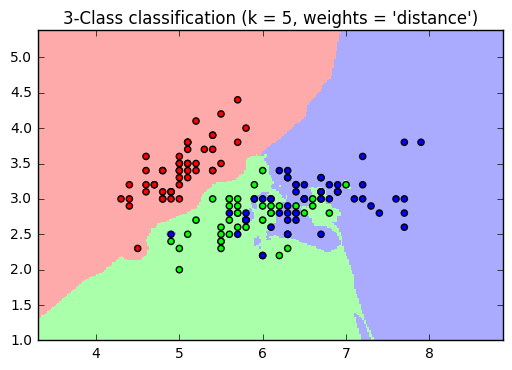

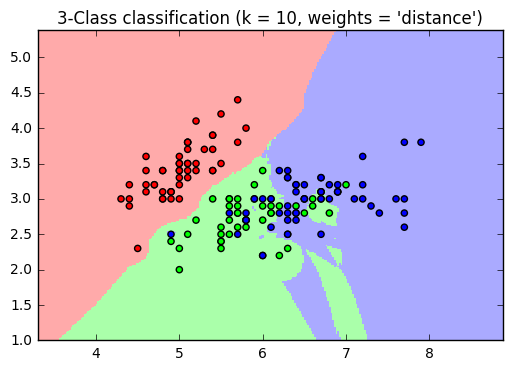

In [12]:
## Visualization of the decision boundaries

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

n_neighbors = 15
weights = 'distance'
#for weights in ['uniform', ]: 
for n_neighbors in [5,10]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    # For supervised learning applications, this accepts two arguments: the data X and the labels y (e.g. model.fit(X, y))
    clf.fit(X, y) # we train again the model as we will use only two variables to visualize the decision boundaries

    # Plot the decision boundary. 
    # For that, we will assign a color to each point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [ ]:
# Exercise (1 minute):
# Plot the decision boundaries for k-NN models of different complexity

# ...write your code here...

In [6]:
# It is possible to save a model in the scikit by using Python’s built-in persistence model, namely pickle.

import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)

# This entails security issues!

# The following method is more efficient on big data, but can only pickle to the disk and not to a string:
from sklearn.externals import joblib
joblib.dump(clf, 'kNN.pkl')
# Later you can load back the pickled model (possibly in another Python process) with:
clf = joblib.load('kNN.pkl')

In [7]:
# For kNN, as the number of features becomes large, the number of training points
# required for a good estimator grows exponentially!
# Hence, really big (long) data set might be needed when you have many features (i.e., wide data set). 

In [3]:
## Nearest Neighbors regression

# This following example demonstrates the resolution of a regression problem using a k-Nearest Neighbor 
# and the interpolation of the target using both barycenter and constant weights.

# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

In [4]:
y

array([ 0.23430296,  0.10091989,  0.34775941,  0.4219966 ,  0.55750066,
        0.71991826,  0.96940081,  0.94059723,  0.87637482,  0.8538402 ,
        0.61790585,  0.75839099,  0.74075654,  0.50756044,  0.47689441,
        0.84495547,  0.38713765,  0.29682859,  0.29496884,  0.12742837,
       -0.08574159,  0.05689193,  0.05338977, -0.05797992, -0.08776485,
       -0.43496758, -0.42082464, -0.66655347, -0.68104667, -0.68968448,
       -0.43950071, -0.75404581, -0.85289554, -0.93507411, -0.96803456,
       -0.62536624, -0.99997983, -0.99993999, -0.99439521, -0.98371764])

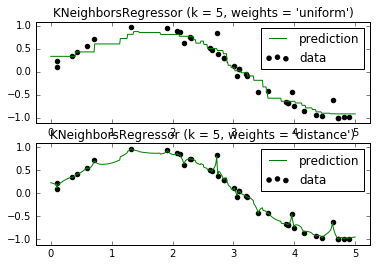

In [9]:
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()